# Create CPA Datasets

In [1]:
0

0

In [2]:
import sys
import os

# import pertpy as pt
import anndata as ad
import scanpy as sc
from pathlib import Path

sc.settings.verbosity = 3
sc.settings.datasetdir = "/lustre/groups/ml01/workspace/kemal.inecik/downloaded_data"

sys.path.append(str(Path(os.getcwd()).resolve().parents[0]))
import tardis
tardis.config = tardis.config_server

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DeJavu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

The available datasets.

```python3
adata_kang = pt.data.kang_2018()
adata_sciplex3 = pt.data.srivatsan_2020_sciplex3()
adata_norman = pt.data.norman_2019()
```

Instead, use the processed formats in:
https://doi.org/10.15252/msb.202211517

In [4]:
!ls -lh /lustre/groups/ml01/workspace/kemal.inecik/tardis_data/processed

total 2.1G
-rw-r--r--. 1 kemal.inecik OG-ICB-User 171M Apr 18 13:43 cpa_GSM_new.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 529M Apr 18 13:44 cpa_kang.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 725M Apr 18 13:45 cpa_Norman2019_prep_new.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User  12M Apr 17 13:55 dataset_subset_age_1.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User  20M Apr 17 13:56 dataset_subset_age_2.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 6.1M Apr 17 13:57 dataset_subset_age_3.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 545M Apr 17 21:09 dataset_subset_age_4.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User  23M Apr 17 13:58 dataset_subset_age_sex_1.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User  12M Apr 17 13:51 dataset_subset_biological_unit_1.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 6.9M Apr 17 13:52 dataset_subset_sample_status_1.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User  11M Apr 17 13:53 dataset_subset_sex_1.h5ad
-rw-r--r--. 1 kemal.inecik OG-ICB-User 7.6M Apr 17 13:54 dataset_sub

/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [5]:
adata_sciplex3_ = ad.read_h5ad(os.path.join(tardis.config.io_directories["processed"], "cpa_GSM_new.h5ad"))
adata_kang_ = ad.read_h5ad(os.path.join(tardis.config.io_directories["processed"], "cpa_kang.h5ad"))
adata_norman_ = ad.read_h5ad(os.path.join(tardis.config.io_directories["processed"], "cpa_Norman2019_prep_new.h5ad"))

## Norman

In [6]:
adata_norman_

AnnData object with n_obs × n_vars = 108497 × 5000
    obs: 'cov_drug_dose_name', 'dose_val', 'control', 'condition', 'guide_identity', 'drug_dose_name', 'cell_type', 'split', 'split1', 'split2', 'split3', 'split4', 'split5', 'split6', 'split7', 'split8', 'split9', 'split10', 'split11', 'split12', 'split13', 'split14', 'split15', 'split16', 'split17', 'split18', 'split19', 'split20', 'split21', 'split22', 'split23', 'split24', 'split25'
    var: 'gene_symbols', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'rank_genes_groups_cov'
    layers: 'counts'

In [7]:
adata_norman_.obs["cell_type"].unique()

['A549']
Categories (1, object): ['A549']

In [8]:
len(adata_norman_.obs["condition"].unique()), len(adata_norman_.obs["drug_dose_name"].unique())

(284, 284)

In [9]:
adata_norman_.obs["control"].value_counts()

0    99590
1     8907
Name: control, dtype: int64

In [10]:
adata_norman_.obs["split"].value_counts(), adata_norman_.obs["split2"].value_counts(), adata_norman_.obs["split16"].value_counts(), adata_norman_.obs["split20"].value_counts(), 

(train    97647
 test     10848
 ood          2
 Name: split, dtype: int64,
 train    84430
 test     21108
 ood       2959
 Name: split2, dtype: int64,
 train    60343
 ood      33068
 test     15086
 Name: split16, dtype: int64,
 train    81158
 test     20290
 ood       7049
 Name: split20, dtype: int64)

In [11]:
adata_norman_.obs

cov_drug_dose_name dose_val  control      condition  \
index                                                                         
AAACCTGAGAAGAAGC-1             A549_ctrl_1        1        1           ctrl   
AAACCTGAGGCATGTG-1   A549_TSC22D1+ctrl_1+1      1+1        0   TSC22D1+ctrl   
AAACCTGAGGCCCTTG-1    A549_KLF1+MAP2K6_1+1      1+1        0    KLF1+MAP2K6   
AAACCTGCACGAAGCA-1             A549_ctrl_1        1        1           ctrl   
AAACCTGCAGACGTAG-1  A549_CEBPE+RUNX1T1_1+1      1+1        0  CEBPE+RUNX1T1   
...                                    ...      ...      ...            ...   
TTTGTCATCAGTACGT-8     A549_FOXA3+ctrl_1+1      1+1        0     FOXA3+ctrl   
TTTGTCATCCACTCCA-8     A549_CELF2+ctrl_1+1      1+1        0     CELF2+ctrl   
TTTGTCATCCCAACGG-8    A549_BCORL1+ctrl_1+1      1+1        0    BCORL1+ctrl   
TTTGTCATCCTCCTAG-8  A549_ZBTB10+PTPN12_1+1      1+1        0  ZBTB10+PTPN12   
TTTGTCATCTGGCGAC-8    A549_MAP4K3+ctrl_1+1      1+1        0    MAP4K3+ctrl   

                                            guide_identity     drug_dose_name  \
index                                                                           
AAACCTGAGAAGAAGC-1    NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0             ctrl_1   
AAACCTGAGGCATGTG-1      TSC22D1_NegCtrl0__TSC22D1_NegCtrl0   TSC22D1+ctrl_1+1   
AAACCTGAGGCCCTTG-1                KLF1_MAP2K6__KLF1_MAP2K6    KLF1+MAP2K6_1+1   
AAACCTGCACGAAGCA-1  NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0             ctrl_1   
AAACCTGCAGACGTAG-1            CEBPE_RUNX1T1__CEBPE_RUNX1T1  CEBPE+RUNX1T1_1+1   
...                                                    ...                ...   
TTTGTCATCAGTACGT-8          FOXA3_NegCtrl0__FOXA3_NegCtrl0     FOXA3+ctrl_1+1   
TTTGTCATCCACTCCA-8          CELF2_NegCtrl0__CELF2_NegCtrl0     CELF2+ctrl_1+1   
TTTGTCATCCCAACGG-8        BCORL1_NegCtrl0__BCORL1_NegCtrl0    BCORL1+ctrl_1+1   
TTTGTCATCCTCCTAG-8            ZBTB10_PTPN12__ZBTB10_PTPN12  ZBTB10+PTPN12_1+1   
TTTGTCATCTGGCGAC-8        MAP4K3_NegCtrl0__MAP4K3_NegCtrl0    MAP4K3+ctrl_1+1   

                   cell_type  split split1 split2  ... split16 split17  \
index                                              ...                   
AAACCTGAGAAGAAGC-1      A549  train  train  train  ...   train   train   
AAACCTGAGGCATGTG-1      A549  train  train  train  ...   train   train   
AAACCTGAGGCCCTTG-1      A549  train  train  train  ...     ood     ood   
AAACCTGCACGAAGCA-1      A549  train   test  train  ...   train   train   
AAACCTGCAGACGTAG-1      A549  train  train  train  ...   train   train   
...                      ...    ...    ...    ...  ...     ...     ...   
TTTGTCATCAGTACGT-8      A549   test   test   test  ...   train   train   
TTTGTCATCCACTCCA-8      A549  train  train  train  ...   train   train   
TTTGTCATCCCAACGG-8      A549  train   test  train  ...   train   train   
TTTGTCATCCTCCTAG-8      A549  train  train  train  ...     ood     ood   
TTTGTCATCTGGCGAC-8      A549  train  train   test  ...   train   train   

                   split18 split19 split20 split21 split22 split23 split24  \
index                                                                        
AAACCTGAGAAGAAGC-1   train   train   train   train   train   train   train   
AAACCTGAGGCATGTG-1   train   train   train   train   train   train   train   
AAACCTGAGGCCCTTG-1     ood     ood     ood   train   train     ood   train   
AAACCTGCACGAAGCA-1   train   train   train   train   train   train    test   
AAACCTGCAGACGTAG-1   train   train   train   train   train     ood   train   
...                    ...     ...     ...     ...     ...     ...     ...   
TTTGTCATCAGTACGT-8    test   train   train   train    test   train   train   
TTTGTCATCCACTCCA-8   train    test   train   train   train   train   train   
TTTGTCATCCCAACGG-8   train   train   train   train   train   train   train   
TTTGTCATCCTCCTAG-8     ood   train   train   train   train     ood   train   
TTTGTCATCTGGCGAC-8    test    test    test 

# Kang

AnnData object with n_obs × n_vars = 13576 × 5000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'stim', 'seurat_annotations', 'integrated_snn_res.0.5', 'seurat_clusters', 'condition', 'cell_type', 'n_counts', 'log_counts', 'n_genes', 'split', 'control', 'dose_val', 'cov_drug_dose_name', 'covars_comb'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'condition_colors', 'hvg', 'neighbors', 'pca', 'rank_genes_groups_cov', 'seurat_annotations_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/

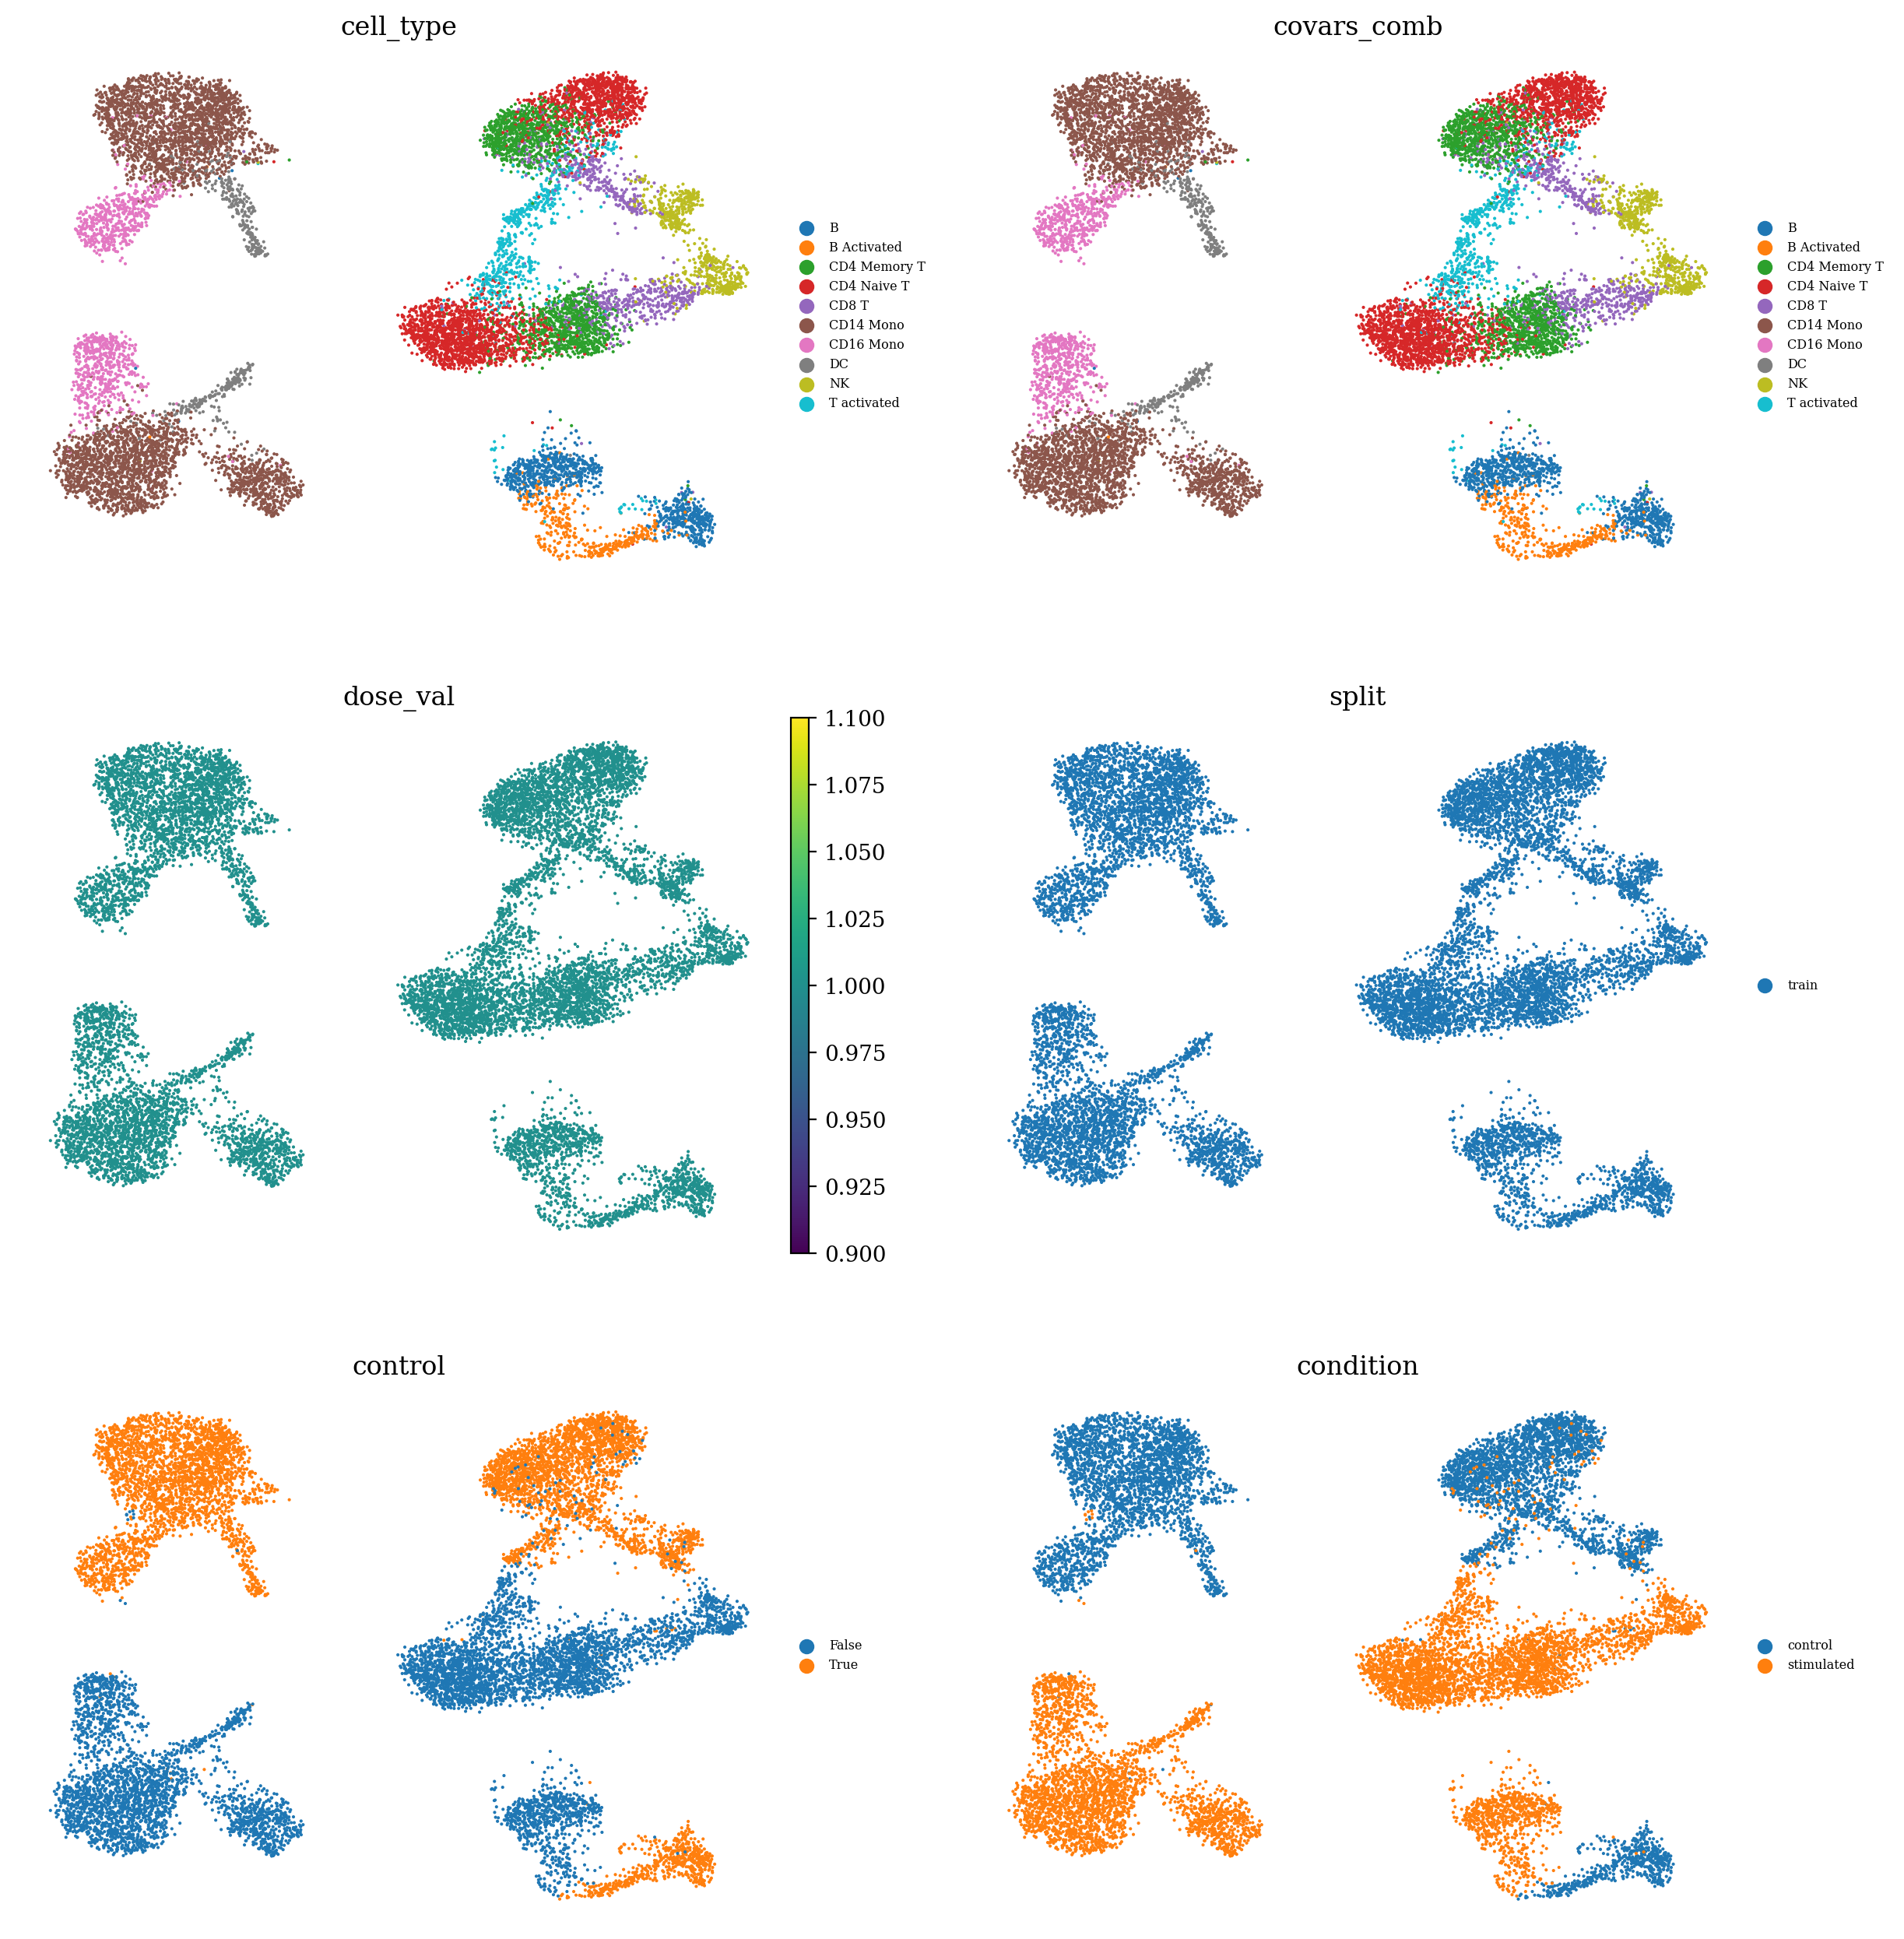

In [12]:
display(adata_kang_)
adata_kang_.obs["control"] = adata_kang_.obs["control"].astype(str)
sc.pl.umap(
    adata_kang_, 
    color=["cell_type", "covars_comb", "dose_val", "split", "control", "condition"], 
    ncols=2,
    frameon=False,
    legend_fontsize="xx-small"
)

# Sciplex3

AnnData object with n_obs × n_vars = 14811 × 4999
    obs: 'sample', 'size_factor', 'n.umi', 'hash_umis', 'pval', 'qval', 'top_to_second_best_ratio', 'top_oligo', 'drug', 'dose', 'vehicle', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'product_dose', 'louvain', 'dose_val', 'cell_type', 'drug_dose_name', 'cov_drug_dose_name', 'condition', 'control', 'split'
    var: 'id', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'dose_colors', 'drug_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'product_dose_colors', 'rank_genes_groups_cov', 'umap', 'vehicle_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/kemal.inecik/tools/apps/mamba/envs/tardis_env/

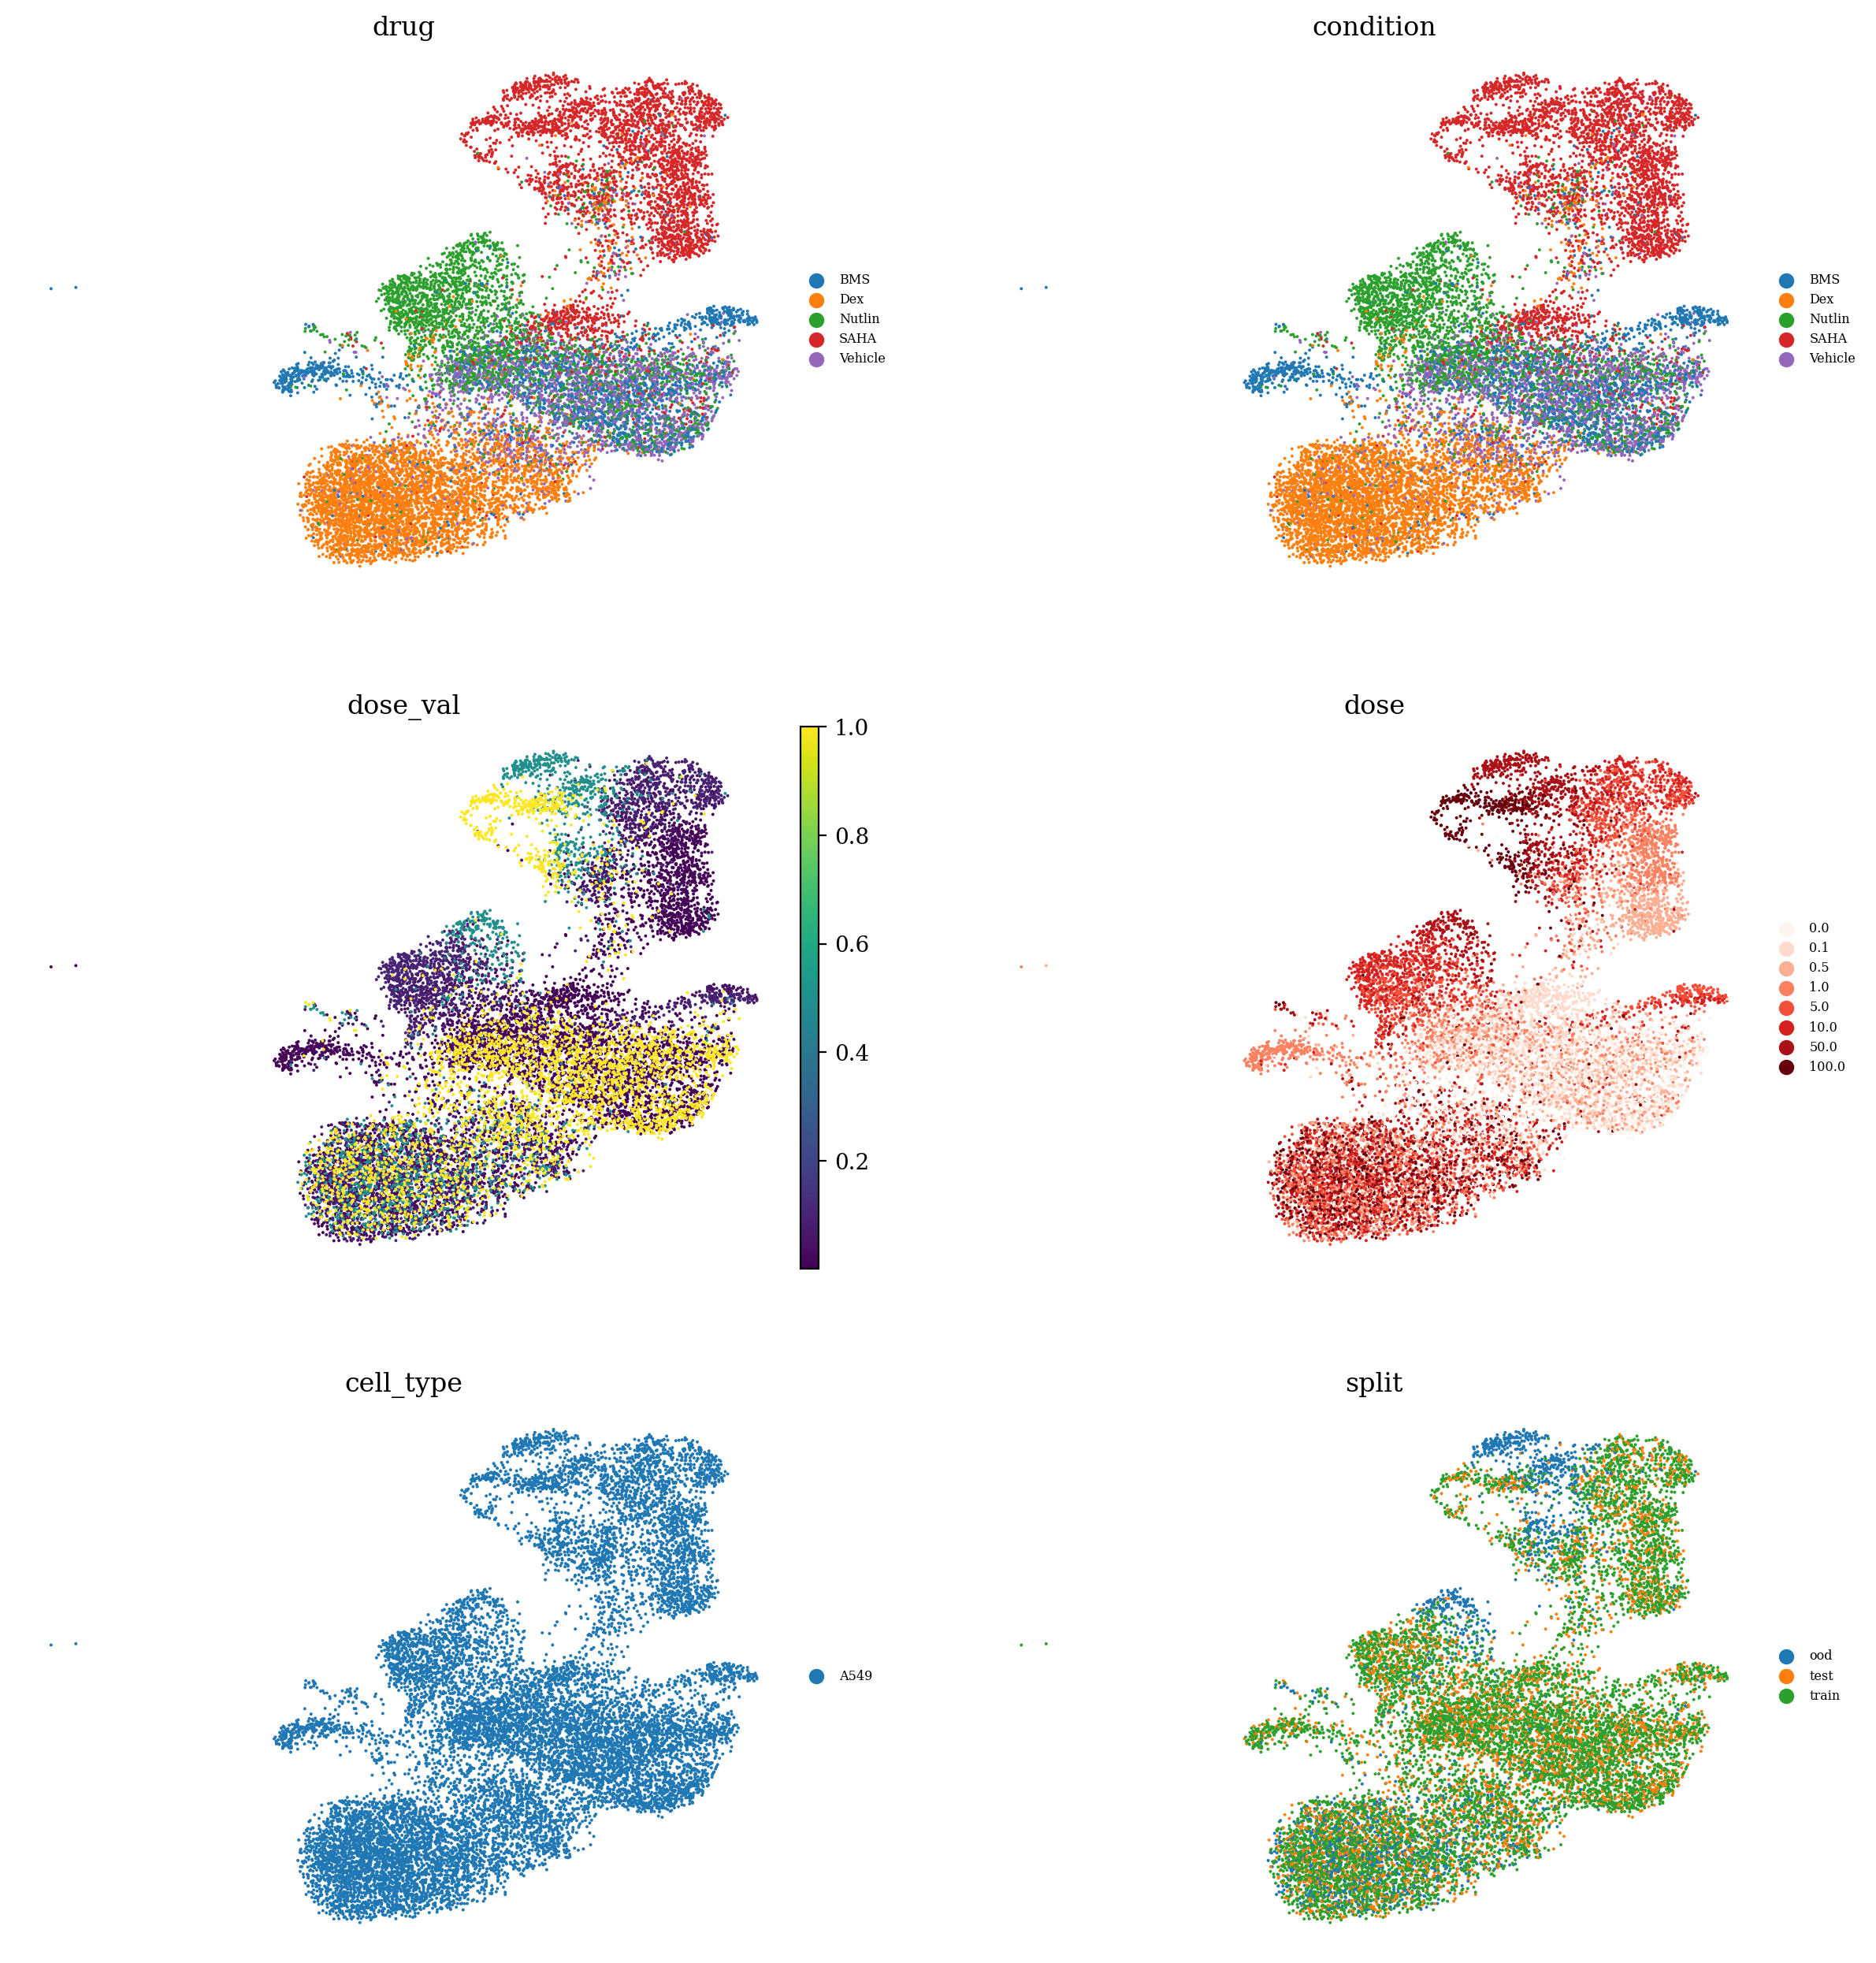

In [13]:
display(adata_sciplex3_)
sc.pl.umap(
    adata_sciplex3_, 
    color=["drug", "condition", "dose_val", "dose", "cell_type", "split"], 
    ncols=2,
    frameon=False,
    legend_fontsize="xx-small"
)

In [14]:
1

1